# Data visialization with Python
## Part 1. Barchart

In [1]:
#Import libraries, load data set

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_669c576bbffa4e59b0e4dcb7c5c97081 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qIIsSJSM50T-spweI7iJSDQmbs5RDNq8Zi5wEGJLiAT6',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_669c576bbffa4e59b0e4dcb7c5c97081.get_object(Bucket='myfirstproject-donotdelete-pr-zif4s2v0otkwnc',Key='Topic_Survey_Assignment.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_spread = pd.read_csv(body, index_col=None)
df_spread.head(7)


,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


In [2]:
#Convert numbers to shares

df_spread['Very interested'] = df_spread['Very interested']/2233*100
df_spread['Somewhat interested'] = df_spread['Somewhat interested']/2233*100
df_spread['Not interested'] = df_spread['Not interested']/2233*100
df_spread.round(2)
df_spread.head(6)

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),59.650694,32.646664,5.687416
1,Data Analysis / Statistics,75.593372,19.883565,2.686968
2,Data Journalism,19.211823,48.410210,27.317510
3,Data Visualization,60.008957,32.870578,4.567846
4,Deep Learning,56.560681,34.482759,6.090461
5,Machine Learning,72.951187,21.361397,3.313927


In [3]:
#Convert column names to typr str

df_spread.columns = list(map(str, df_spread.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_spread.columns)


True

In [4]:
#Sort values in descending order

df_spread.sort_values(by="Very interested", ascending=False, inplace=True)
df_spread

,Unnamed: 0,Very interested,Somewhat interested,Not interested
1,Data Analysis / Statistics,75.593372,19.883565,2.686968
5,Machine Learning,72.951187,21.361397,3.313927
3,Data Visualization,60.008957,32.870578,4.567846
0,Big Data (Spark / Hadoop),59.650694,32.646664,5.687416
4,Deep Learning,56.560681,34.482759,6.090461
2,Data Journalism,19.211823,48.410210,27.317510


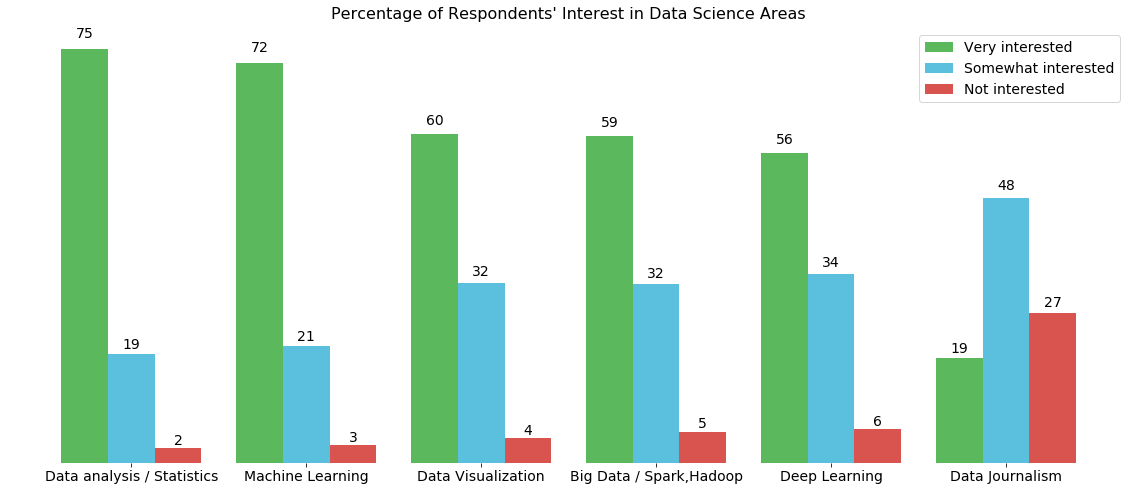

In [7]:
#Plot the graph

import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

N = 6
ind = np.arange(0, N * 3, 3)
width = 0.8       # the width of the bars

fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(111)

VI_means = df_spread['Very interested']
rects1 = ax.bar(ind, VI_means, width, color='#5cb85c')

SI_means = df_spread['Somewhat interested']
rects2 = ax.bar(ind+width, SI_means, width, color='#5bc0de')

NI_means = df_spread['Not interested']
rects3 = ax.bar(ind+width*2, NI_means, width, color='#d9534f')


title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space


ax.set_xticks(ind+width)
ax.set_xticklabels( ('Data analysis / Statistics', 'Machine Learning', 'Data Visualization', 'Big Data / Spark,Hadoop', 'Deep Learning', 'Data Journalism') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Very interested', 'Somewhat interested', 'Not interested') )


def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.02*h, '%d'%int(h), fontsize=14, 
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)



matplotlib.rc('xtick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=14)    # legend fontsize
plt.title("Percentage of Respondents\' Interest in Data Science Areas", **title_font)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_yaxis().set_ticks([])





plt.show()
